In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174


In [ ]:
len(df)

10003

Split into train and test



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

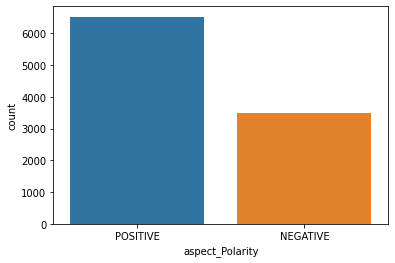

In [ ]:
sns.countplot(df.aspect_Polarity)
df.aspect_Polarity.value_counts()

In [ ]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


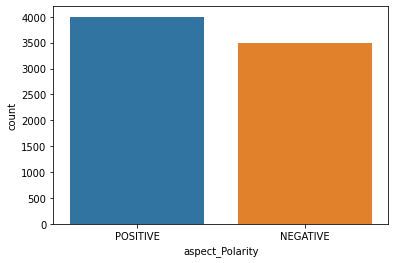

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
5845,5845,"perfect business travel pleasure, magnolia hot...",4,"perfect business travel pleasure, magnolia hot...",onebr suites gorgeous,0.321446,0.210650,0.239681,0.186677,0.059723,room,0.321446,POSITIVE,0.998476
2823,2823,"make reservation, wo n't disappointed, news co...",5,"make reservation, wo n't disappointed, news co...",recommend hotel andra reservation maybe reser...,0.270982,0.214157,0.308211,0.186548,0.138356,location,0.308211,NEGATIVE,0.986094
4842,4842,"no 10 location close airport, seatac area not ...",2,"no ten location close airport, seatac area not...",new bed linens towels help.the location near ...,0.213316,0.072983,0.108872,0.093107,0.011689,room,0.213316,POSITIVE,0.997213
4908,4908,dreadful hotel embodiment downside priceline w...,1,dreadful hotel embodiment downside priceline w...,awful hotel experiences,0.349327,0.247493,0.162926,0.215914,0.166535,room,0.349327,POSITIVE,0.998623
3670,3670,great location great hotel chose hotel reason ...,4,great location great hotel chose hotel reason ...,breakfast nothing special bad good,0.232598,0.145231,0.067523,0.223702,0.500943,food,0.500943,POSITIVE,0.974950


In [ ]:
# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
      return 1
    else:
        return 0
    
df['label'] = df['aspect_Polarity'].apply(making_label)
print(df.shape)

(7486, 15)


In [ ]:
# conversion of input data
df = pd.DataFrame({
    'text': df['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': df['label']
})


In [ ]:
df.head()

,text,label
5845,onebr suites gorgeous,1
2823,recommend hotel andra reservation maybe reser...,0
4842,new bed linens towels help.the location near ...,1
4908,awful hotel experiences,1
3670,breakfast nothing special bad good,1


In [ ]:
print(df.shape)
X = df['text']
y = df['label']

(7486, 2)


**Train_Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5988,)
(1498,)
(5988,)
(1498,)


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

**Preparing the Embedding Layer**

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

6892

**CNN**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          689200    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=5, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)
pred = model.predict(X_test)

Epoch 1/5
19/19 [==============================] - 4s 62ms/step - loss: 0.6888 - accuracy: 0.5367 - val_loss: 0.6827 - val_accuracy: 0.6052
Epoch 2/5
19/19 [==============================] - 0s 9ms/step - loss: 0.6623 - accuracy: 0.6541 - val_loss: 0.6449 - val_accuracy: 0.7145
Epoch 3/5
19/19 [==============================] - 0s 9ms/step - loss: 0.5825 - accuracy: 0.7276 - val_loss: 0.5455 - val_accuracy: 0.7596
Epoch 4/5
19/19 [==============================] - 0s 10ms/step - loss: 0.4702 - accuracy: 0.7927 - val_loss: 0.4799 - val_accuracy: 0.7688
Epoch 5/5
47/47 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7670


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.47893190383911133
Test Accuracy: 0.7670226693153381


In [ ]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train','test'], loc = 'upper left')
  plt.show()

In [ ]:
def evaluate(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    y_hat = (y_hat >= 0.5).astype(np.float32)
    print('rectified y_hat')
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

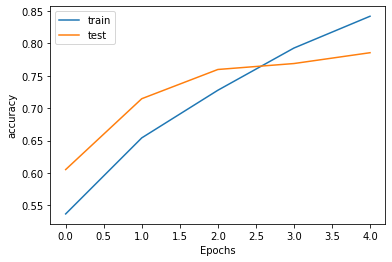

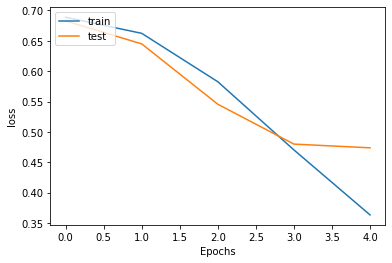

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



In [ ]:
report = evaluate(model,X_test,y_test)
print(report)

[[0.8774254 ]
 [0.3680201 ]
 [0.49864125]
 ...
 [0.02493076]
 [0.6713495 ]
 [0.04028972]]
rectified y_hat
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       692
           1       0.76      0.83      0.79       806

    accuracy                           0.77      1498
   macro avg       0.77      0.76      0.76      1498
weighted avg       0.77      0.77      0.77      1498



Hyperparametr Optimization

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
        tf.keras.layers.Conv1D(num_filters, kernel_size, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
 # Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[100],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=3, batch_size=10,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_result.best_params_)
test_accuracy

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          689200    
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 709,125
Trainable params: 709,125
Non-trainabl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          689200    
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 709,125
Trainable params: 709,125
Non-trainable params: 0
________________________________________________

0.7970627546310425

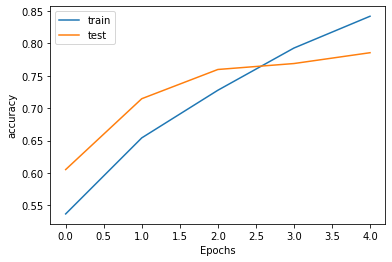

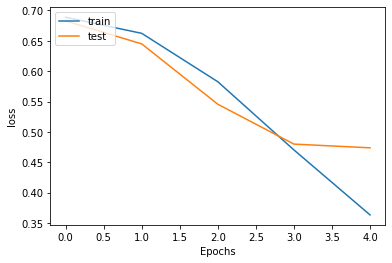

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
def evaluate_cv(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [ ]:
report = evaluate_cv(grid_result,X_test,y_test)
print(report)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       692
           1       0.82      0.79      0.81       806

    accuracy                           0.80      1498
   macro avg       0.80      0.80      0.80      1498
weighted avg       0.80      0.80      0.80      1498

